In [5]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def full_remove_black_borders(image):
    """
    Fully removes black borders around the Petri dish image, ensuring no black edges remain.

    Args:
        image (numpy array): Input raw image.

    Returns:
        cropped_image (numpy array): Cropped image without black borders.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate black regions
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour assuming it contains the Petri dish
    if not contours:
        raise ValueError("No contours found.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y + h, x:x + w]
    
    return cropped_image

In [7]:
# Paths for the newly uploaded images
final_uploaded_image_paths = [
    "train_Alican_232202_im5.png", 
    "051_43-11-ROOT1-2023-08-08_control_pH7_-Fe+B_col0_04-Fish Eye Corrected.png",
    "train_Dean_226324_im1.png",
    "030_43-2-ROOT1-2023-08-08_pvdCherry_OD001_Col0_05-Fish Eye Corrected.png"
]

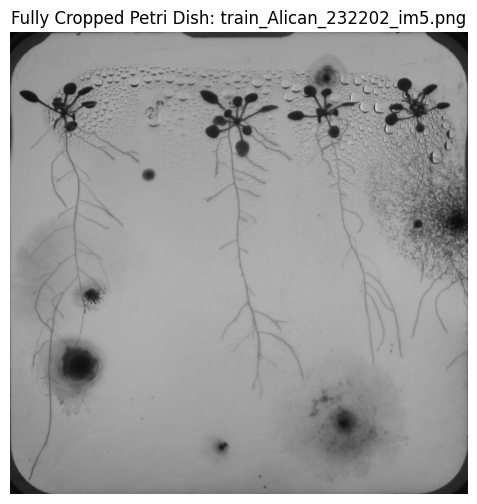

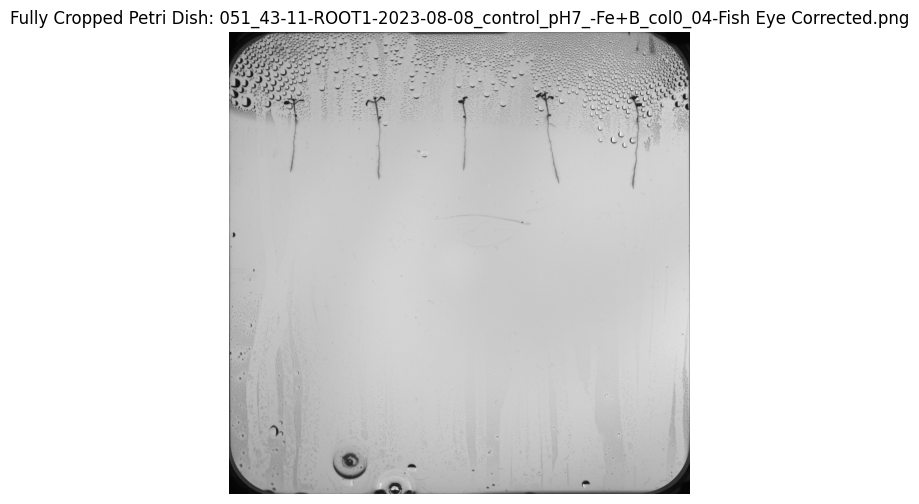

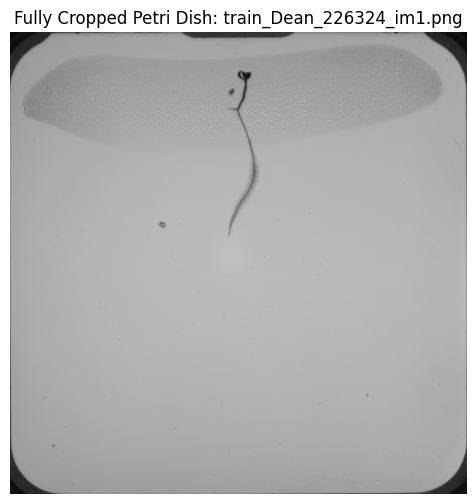

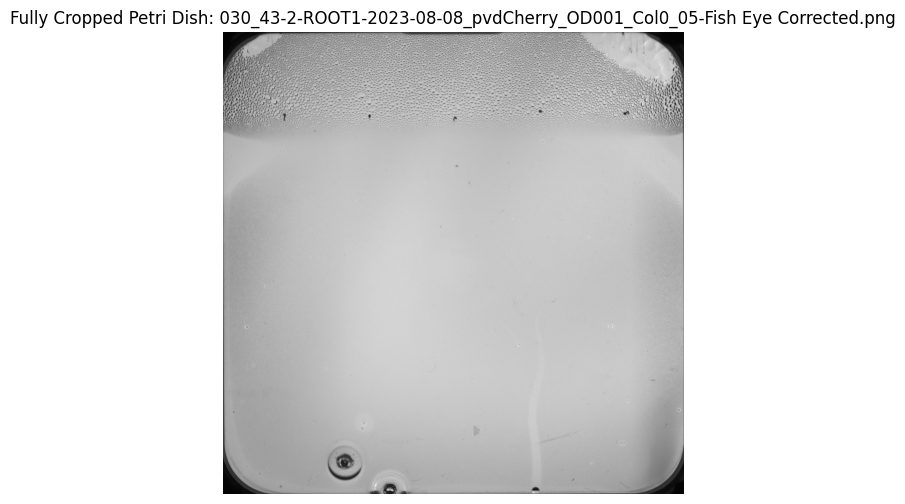

In [8]:
# Test the final refined method
for path in final_uploaded_image_paths:
    img = cv2.imread(path)
    if img is None:
        print(f"Error loading image: {path}")
        continue

    try:
        # Remove black borders completely
        fully_cropped_img = full_remove_black_borders(img)
        
        # Display the result
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(fully_cropped_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Fully Cropped Petri Dish: {path.split('/')[-1]}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error processing {path}: {e}")